### Introduction to neural network classification with Tensorflow

In this notebook we're going to learn to write neural network for classification problems

A classification problem is where you try to classify something as one thing or another

A few types of classification problems:
1. Binary classification
2. Multiclass classification
3. Multilabel classification

In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

n_samples = 1000
X, y = make_circles(n_samples=n_samples,
                    noise=0.03,
                    random_state=42)


In [2]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
import pandas as pd

circle = pd.DataFrame({'X0':X[:, 0], 'X1':X[:, 1], 'label': y})
circle

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


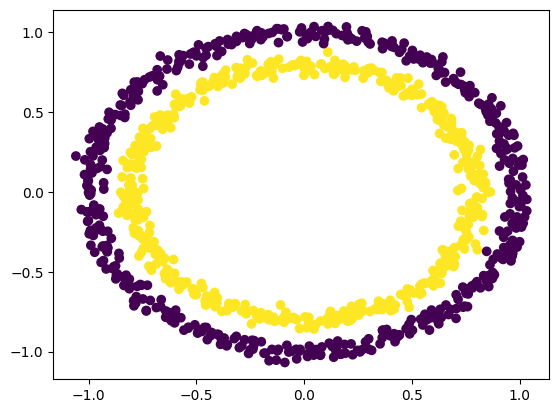

In [5]:
import matplotlib.pyplot as plt

plt.scatter(circle['X0'], circle['X1'], c=y)

In [6]:
from sklearn.model_selection import train_test_split

X = circle.drop('label', axis=1)
y = circle['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train.shape, X_test.shape

((800, 2), (200, 2))

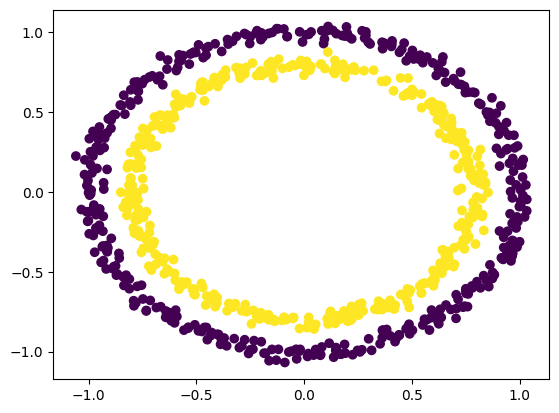

In [8]:
plt.scatter(X_train['X0'], X_train['X1'], c=y_train)

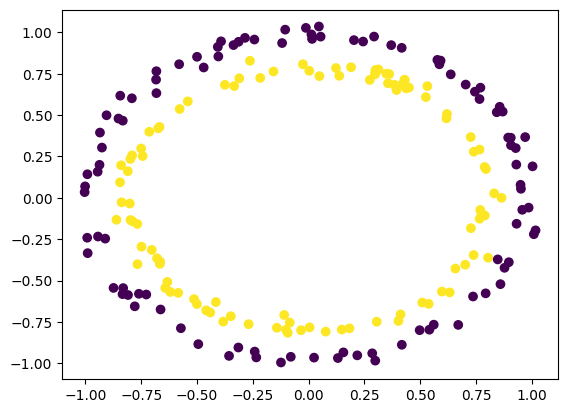

In [9]:
plt.scatter(X_test['X0'], X_test['X1'], c=y_test)

In [10]:
import tensorflow as tf
# first classification model
tf.random.set_seed(42)

# create the model
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history1 = model1.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5254 - loss: 0.6979
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5295 - loss: 0.6937
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5214 - loss: 0.6908
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5133 - loss: 0.6887 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5222 - loss: 0.6871
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5275 - loss: 0.6858
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5398 - loss: 0.6846
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5579 - loss: 0.6836
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5762 - loss: 0.6827
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5996 - loss: 0.6818
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6045 - loss: 0.6809
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

In [11]:
model1.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9629 - loss: 0.5516  


[0.557540774345398, 0.9449999928474426]

In [12]:
import numpy as np

In [13]:
x_min, x_max = X_train['X0'].min() - 0.1, X_train['X0'].max() + 0.1
y_min, y_max = X_train['X1'].min() - 0.1, X_train['X1'].max() + 0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = model1.predict(grid)

1661/1661 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [14]:
Z.shape

(53130, 1)

In [15]:
Z = Z.reshape(xx.shape)

In [16]:
Z.shape

(231, 230)

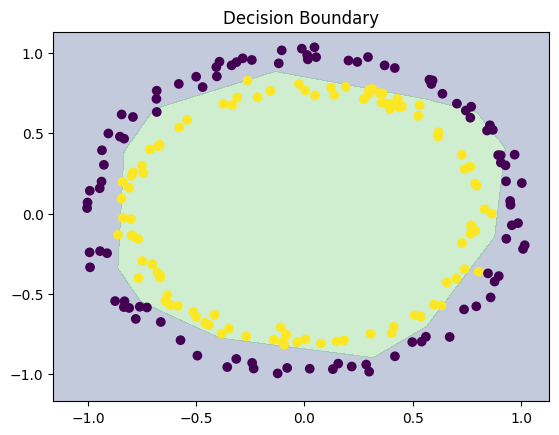

In [17]:
plt.contourf(xx, yy, Z, levels=1, alpha=0.3, cmap='viridis')
plt.scatter(X_test['X0'], X_test['X1'], c=y_test)
plt.title('Decision Boundary')
plt.show()

In [42]:
def plot_contour(model, X, y):
  if isinstance(X, pd.DataFrame):
    X = X.to_numpy()
  if isinstance(y, pd.DataFrame):
    y = y.to_numpy()

  if y.ndim == 2 and y.shape[1] > 1:
    y = np.argmax(y, axis=1)

  X0 = X[:, 0]
  X1 = X[:, 1]
  x_min, x_max = X0.min() - 0.1, X0.max() + 0.1
  y_min, y_max = X1.min() - 0.1, X1.max() + 0.1

  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                       np.arange(y_min, y_max, 0.05))

  grid = np.c_[xx.ravel(), yy.ravel()]
  Z = model.predict(grid)
  if Z.ndim > 1 and Z.shape[1] > 1:
    print('doing multiclass classification')
    Z = np.argmax(Z, axis=1).reshape(xx.shape)
  else:
    print('doing binary classification')
    Z = np.round(Z).reshape(xx.shape)

  num_classes = len(np.unique(y))
  cmap = plt.get_cmap('RdYlBu', num_classes)

  plt.contourf(xx, yy, Z, alpha=0.7, cmap=cmap, levels=np.arange(num_classes +1) - 0.5)
  plt.scatter(X0, X1, c=y, cmap=cmap, edgecolor='k')

  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.title('Decision Boundary')
  plt.show()

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


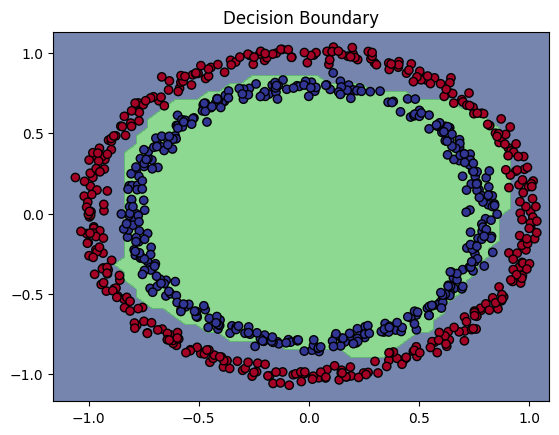

In [19]:
plot_contour(model=model1,
             X=X_train,
             y=y_train)

<Axes: >

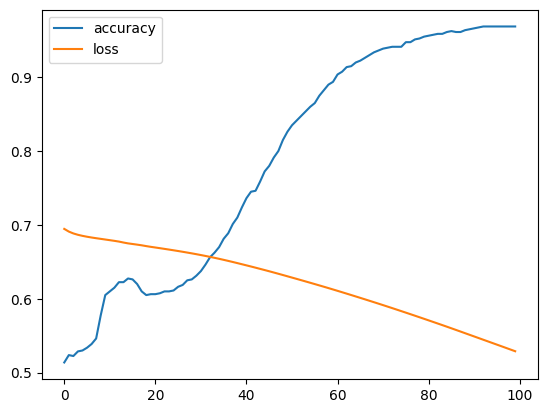

In [20]:
pd.DataFrame(history1.history).plot()

In [21]:
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples, noise=0.05, random_state=42)

In [22]:
X.shape, y.shape

((1000, 2), (1000,))

In [23]:
type(X)

numpy.ndarray

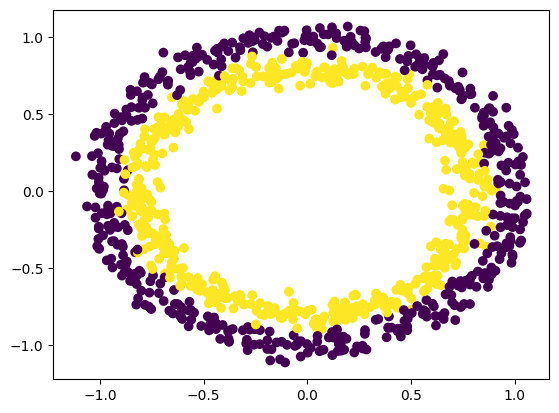

In [24]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [26]:
# start building the model
tf.random.set_seed(42)

# build the model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
# NOTE: we can pass the loss as :
# 1. loss=tf.keras.losses.binary_crossentropy
# 2. loss=tf.keras.losses.BinaryCrossentropy()
# 3. loss='binary_crossentropy'
model2.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# fit the model
history2 = model2.fit(X_train, y_train, epochs=200)

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5025 - loss: 0.6911
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5031 - loss: 0.6890
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5208 - loss: 0.6877 
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5304 - loss: 0.6866 
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5287 - loss: 0.6855 
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5289 - loss: 0.6843 
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5338 - loss: 0.6830 
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5490 - loss: 0.6815 
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5636 - loss: 0.6799 
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5679 - loss: 0.6781
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5923 - loss: 0.6761
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - ac

<Axes: >

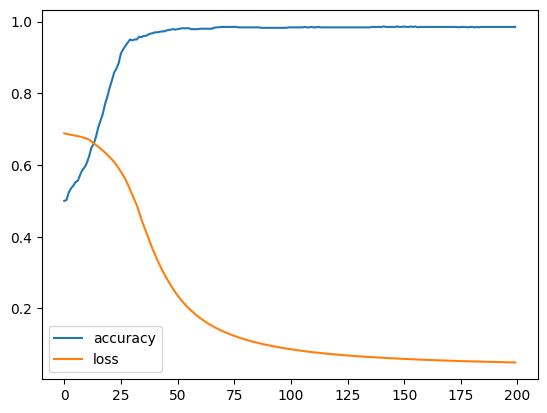

In [27]:
import pandas as pd
pd.DataFrame(history2.history).plot()

In [28]:
model2.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9427 - loss: 0.1309  


[0.14406923949718475, 0.9300000071525574]

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


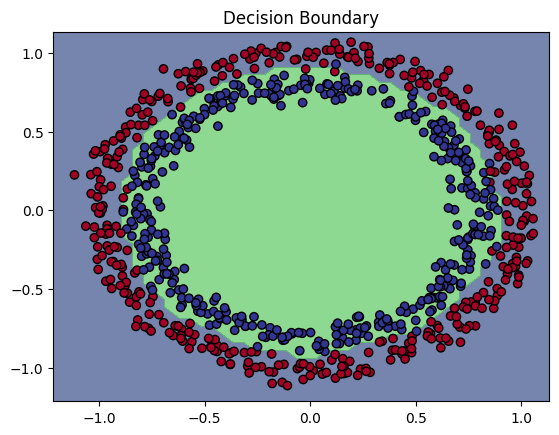

In [29]:
plot_contour(model=model2,
             X=X_train,
             y=y_train)

In [30]:
from sklearn.datasets import make_blobs

n_samples = 1000
n_features = 2
X, y = make_blobs(n_samples=n_samples,
                  n_features=n_features,
                  centers=3,
                  random_state=42,
                  cluster_std=2.5)

In [31]:
X.shape, y.shape

((1000, 2), (1000,))

In [32]:
X

array([[-6.17140751, -7.52737203],
       [-5.02438876, -6.13187814],
       [ 6.03569612,  2.16318316],
       ...,
       [ 2.26638161,  8.55412485],
       [ 3.11609833,  1.50574143],
       [-8.28504726, -7.40316428]])

In [33]:
type(y)

numpy.ndarray

In [34]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([334, 333, 333]))

In [35]:
n_labels = len(np.unique(y))
n_labels

3

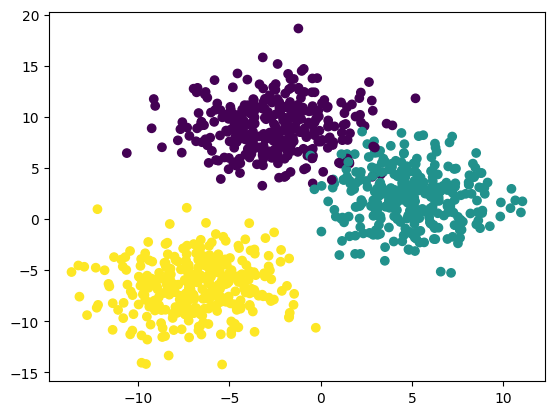

In [36]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o')

In [37]:
from sklearn.model_selection import train_test_split

# for multiclass classification we need to first onehotencode y
y = np.eye(n_labels)[y]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

800 200 800 200
(800, 2) (800, 3) (200, 2) (200, 3)


In [38]:
# start building the model
tf.random.set_seed(42)

# build the model
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(n_labels, activation='softmax'),
])

# compile the model
model3.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# fit the model
history3 = model3.fit(X_train, y_train, epochs=10)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3312 - loss: 1.9438
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6111 - loss: 0.6528 
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6434 - loss: 0.5344
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7013 - loss: 0.4944
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8093 - loss: 0.4634
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8531 - loss: 0.4365
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8761 - loss: 0.4117
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8877 - loss: 0.3878
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9037 - loss: 0.3625
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9078 - loss: 0.3335


In [39]:
model3.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9123 - loss: 0.2725  


[0.2675851583480835, 0.9300000071525574]

10303/10303 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step
doing multiclass classification


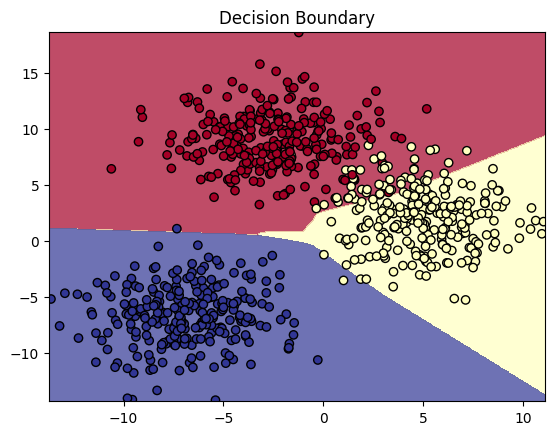

In [43]:
plot_contour(model=model3,
             X=X_train,
             y=y_train)

<Axes: >

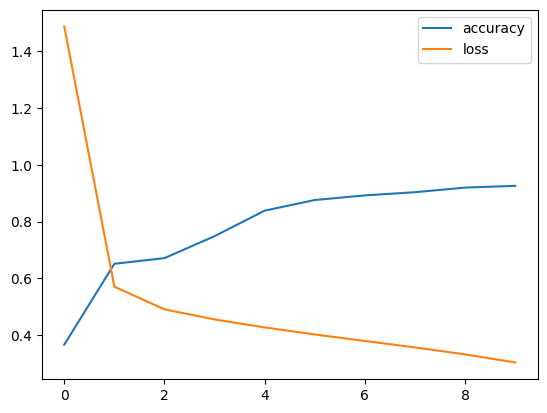

In [41]:
pd.DataFrame(history3.history).plot()

In [44]:
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples=n_samples,
                    noise=0.05,
                    random_state=42)

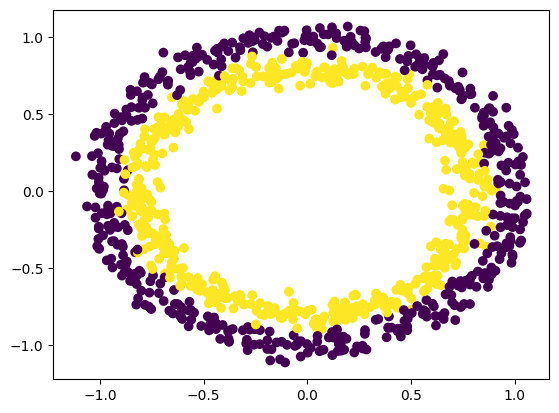

In [45]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [55]:
# Anothe rmodel
tf.random.set_seed(42)

# creating the model
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model4.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(0.05),
               metrics=['accuracy'])

# fit the model
history4 = model4.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4747 - loss: 0.7107
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5486 - loss: 0.6775 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5975 - loss: 0.6454 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6492 - loss: 0.6082 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6936 - loss: 0.5672 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7728 - loss: 0.4812 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7960 - loss: 0.4289 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8771 - loss: 0.3179 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9357 - loss: 0.2075 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9060 - loss: 0.2026 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9369 - loss: 0.1484 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


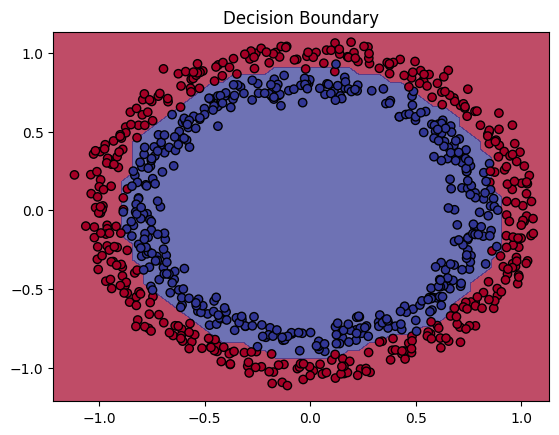

In [56]:
plot_contour(model=model4,
             X=X_train,
             y=y_train)

In [57]:
model4.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9273 - loss: 0.1689  


[0.18271754682064056, 0.9100000262260437]

<Axes: >

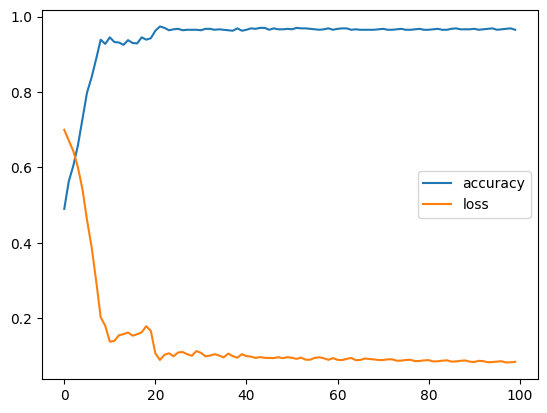

In [58]:
pd.DataFrame(history4.history).plot()

In [59]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model4.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [66]:
y_pred = np.squeeze(np.round(y_pred).astype(int))

In [67]:
y_pred

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1])

In [69]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

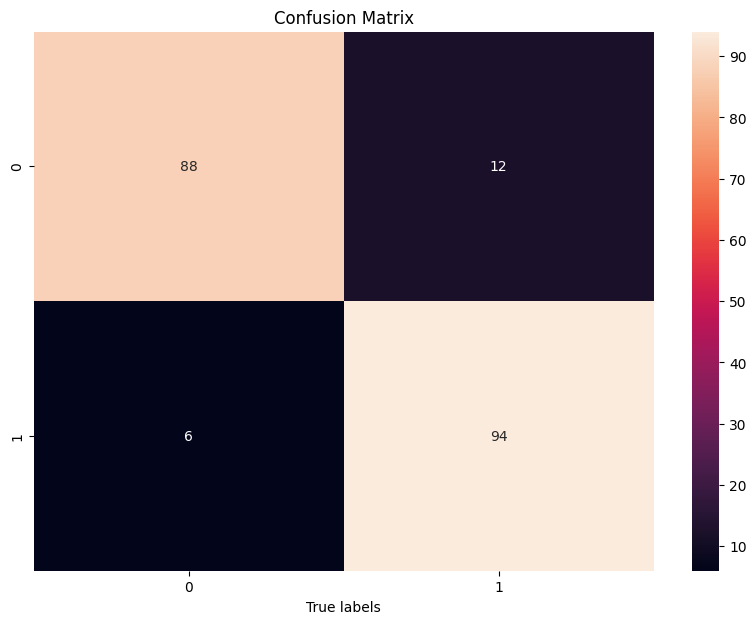

In [70]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.xlabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [71]:
cm

array([[88, 12],
       [ 6, 94]])

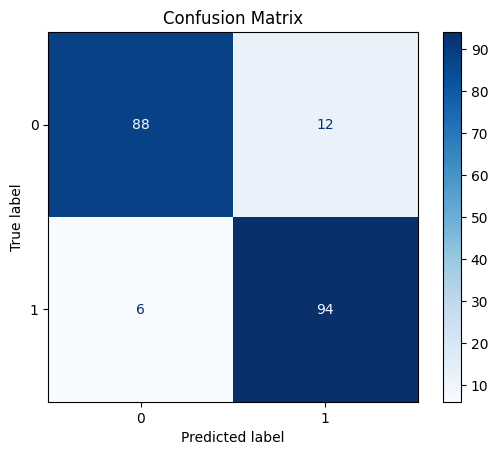

In [72]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [73]:
from sklearn.metrics import classification_report

report = classification_report(y_true=y_test, y_pred=y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       100
           1       0.89      0.94      0.91       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



In [76]:
# New data
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=2000,
                  n_features=2,
                  centers=5,
                  cluster_std=2,
                  random_state=42)

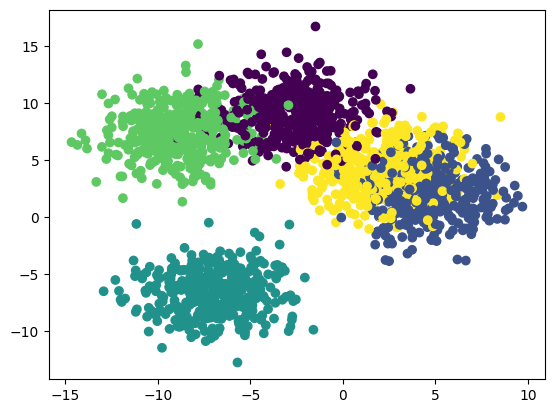

In [77]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [81]:
# One hot encoding y
from tensorflow.keras.utils import to_categorical

y_onehot = to_categorical(y)
y_onehot

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [85]:
n_classes = len(np.unique(y))
n_classes

5

In [79]:
y

array([4, 0, 1, ..., 2, 1, 4])

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_onehot_train, y_onehot_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_onehot_train.shape, y_onehot_test.shape

((1600, 2), (400, 2), (1600, 5), (400, 5))

In [88]:
# start creating the model
tf.random.set_seed(42)

# create the model
model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation='softmax'),
])

# compile the model
model5.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# fit the model
history5 = model5.fit(X_train, y_onehot_train, epochs=100)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2022 - loss: 3.4150
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4972 - loss: 1.7728
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6618 - loss: 1.1655
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6928 - loss: 0.8208
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8391 - loss: 0.6136
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8364 - loss: 0.4953
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8460 - loss: 0.4254
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8461 - loss: 0.3903
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8432 - loss: 0.3707
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8425 - loss: 0.3586
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8437 - loss: 0.3501
Epoch 12/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

8929/8929 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step
doing multiclass classification


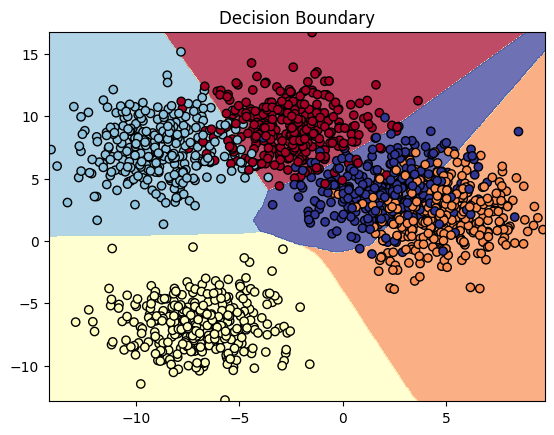

In [89]:
plot_contour(model=model5,
             X=X_train,
             y=y_onehot_train)

<Axes: >

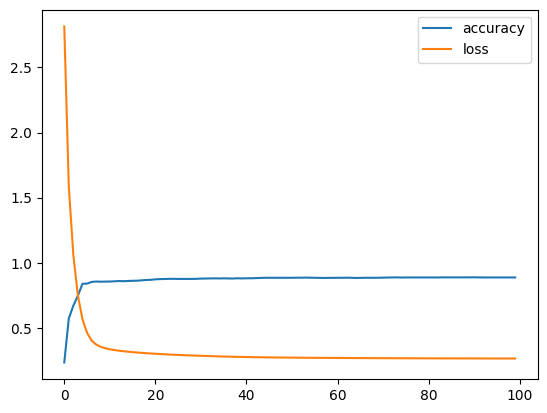

In [90]:
pd.DataFrame(history5.history).plot()

In [91]:
model5.evaluate(X_test, y_onehot_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8809 - loss: 0.2757  


[0.28045234084129333, 0.875]

In [92]:
y_onehot_pred = model5.predict(X_test)
y_onehot_pred

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[6.1399681e-03, 3.2981551e-09, 9.4810575e-06, 9.9382490e-01,
        2.5600541e-05],
       [4.4651280e-04, 4.3515299e-11, 5.0493998e-07, 9.9955159e-01,
        1.2989709e-06],
       [2.7293365e-09, 9.8579717e-01, 2.2109545e-09, 5.5845945e-10,
        1.4202817e-02],
       ...,
       [3.4568273e-04, 4.4842780e-01, 2.6031050e-06, 4.1947068e-08,
        5.5122381e-01],
       [1.1432471e-02, 1.5979190e-01, 1.9420235e-05, 1.6903724e-07,
        8.2875603e-01],
       [2.0426544e-08, 5.8225780e-08, 9.9999982e-01, 2.0087635e-11,
        1.3330809e-11]], dtype=float32)

In [93]:
y_pred = np.argmax(y_onehot_pred, axis=1)
y_pred

array([3, 3, 1, 3, 3, 4, 2, 2, 4, 3, 3, 0, 0, 1, 4, 4, 4, 1, 2, 0, 2, 2,
       1, 0, 3, 2, 4, 0, 2, 1, 0, 3, 2, 4, 0, 2, 2, 4, 3, 2, 2, 2, 4, 4,
       3, 4, 1, 2, 4, 1, 4, 0, 0, 3, 2, 3, 1, 0, 2, 1, 2, 4, 1, 3, 4, 0,
       3, 0, 4, 1, 3, 1, 4, 4, 1, 2, 3, 3, 3, 3, 0, 1, 3, 2, 3, 0, 1, 1,
       2, 4, 3, 4, 1, 0, 0, 3, 0, 1, 1, 2, 3, 3, 1, 0, 0, 0, 2, 4, 1, 3,
       4, 4, 1, 3, 0, 4, 3, 0, 4, 1, 3, 4, 3, 3, 4, 0, 1, 2, 3, 3, 1, 1,
       3, 3, 4, 1, 0, 1, 2, 3, 4, 1, 3, 0, 4, 4, 1, 4, 0, 1, 1, 4, 3, 2,
       4, 1, 3, 4, 0, 2, 2, 3, 2, 0, 1, 2, 0, 2, 1, 3, 1, 3, 4, 1, 2, 0,
       3, 0, 4, 1, 0, 4, 0, 3, 3, 0, 0, 0, 2, 0, 1, 0, 3, 2, 4, 0, 4, 2,
       2, 0, 4, 3, 3, 1, 3, 3, 0, 0, 4, 3, 2, 3, 3, 0, 4, 2, 3, 2, 4, 2,
       2, 4, 1, 2, 0, 4, 4, 4, 0, 4, 2, 1, 1, 4, 3, 3, 3, 4, 0, 3, 3, 1,
       3, 1, 0, 1, 2, 2, 3, 2, 3, 4, 4, 3, 4, 3, 0, 1, 4, 4, 4, 0, 4, 1,
       3, 3, 4, 3, 0, 4, 0, 4, 1, 3, 1, 0, 4, 2, 3, 2, 2, 4, 3, 3, 0, 3,
       2, 4, 3, 1, 0, 3, 2, 0, 0, 4, 1, 2, 4, 4, 0,

In [94]:
y_test = np.argmax(y_onehot_test, axis=1)
y_test

array([3, 3, 1, 3, 3, 1, 2, 2, 4, 3, 3, 4, 0, 4, 4, 4, 4, 1, 2, 0, 2, 2,
       1, 0, 3, 2, 4, 0, 2, 4, 0, 3, 2, 0, 0, 2, 2, 4, 3, 2, 2, 2, 4, 4,
       3, 4, 4, 2, 4, 4, 1, 0, 0, 3, 2, 3, 4, 0, 2, 1, 2, 4, 1, 3, 4, 1,
       3, 0, 4, 1, 3, 1, 4, 4, 1, 2, 3, 3, 3, 3, 0, 4, 3, 2, 3, 0, 1, 1,
       2, 1, 3, 4, 1, 0, 0, 3, 0, 1, 1, 2, 3, 3, 1, 0, 0, 0, 2, 4, 1, 3,
       4, 4, 1, 3, 0, 4, 3, 0, 4, 4, 0, 4, 3, 3, 4, 0, 4, 2, 3, 3, 1, 1,
       3, 3, 1, 1, 0, 4, 2, 3, 4, 1, 3, 0, 4, 4, 1, 4, 0, 1, 1, 4, 0, 2,
       4, 1, 3, 4, 0, 2, 2, 3, 2, 0, 1, 2, 0, 2, 1, 0, 1, 3, 4, 1, 2, 0,
       3, 0, 4, 1, 0, 4, 0, 3, 3, 4, 0, 0, 2, 0, 4, 0, 3, 2, 1, 0, 4, 2,
       2, 0, 4, 3, 3, 1, 3, 3, 4, 0, 4, 3, 2, 3, 3, 0, 4, 2, 3, 2, 4, 2,
       2, 4, 4, 2, 0, 4, 4, 1, 0, 4, 2, 1, 1, 4, 3, 3, 3, 1, 0, 3, 3, 1,
       3, 4, 0, 4, 2, 2, 3, 2, 3, 4, 4, 3, 4, 3, 0, 1, 4, 4, 4, 0, 4, 1,
       0, 3, 4, 3, 0, 4, 0, 1, 1, 3, 1, 3, 4, 2, 3, 2, 2, 4, 3, 3, 0, 3,
       2, 4, 3, 4, 0, 3, 2, 0, 0, 4, 4, 2, 1, 4, 0,

In [97]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

clr = classification_report(y_true=y_test, y_pred=y_pred)
clr

'              precision    recall  f1-score   support\n\n           0       0.93      0.89      0.91        83\n           1       0.69      0.78      0.73        63\n           2       1.00      1.00      1.00        69\n           3       0.91      0.98      0.94        87\n           4       0.84      0.74      0.79        98\n\n    accuracy                           0.88       400\n   macro avg       0.87      0.88      0.87       400\nweighted avg       0.88      0.88      0.87       400\n'

In [98]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [99]:
cm

array([[74,  0,  0,  8,  1],
       [ 1, 49,  0,  0, 13],
       [ 0,  0, 69,  0,  0],
       [ 2,  0,  0, 85,  0],
       [ 3, 22,  0,  0, 73]])

[]

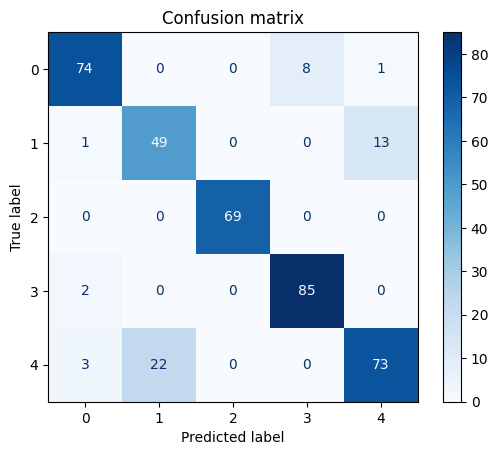

In [100]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion matrix')
plt.plot()